# Exploratory Data Analysis and Prediction of the Wisconsin Breast Cancer dataset

A mass of abnormal tissue is known as a tumor. There are two types of tumors: benign, which are non-cancerous and malignant, which are cancerous.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [3]:
dataset = pd.read_csv("wisc_bc_data.csv")

In [4]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
dataset.shape

(569, 32)

In [6]:
dataset.info() # provide all necessary information about the breast cancer dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [7]:
dataset.groupby('diagnosis').size() # return an int representing the number of elements in an object

diagnosis
B    357
M    212
dtype: int64

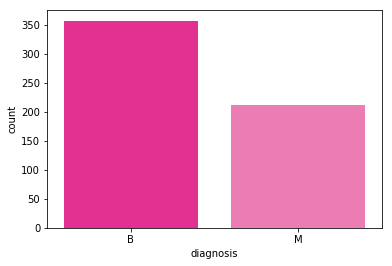

In [8]:
sns.countplot(dataset['diagnosis'], label = "Count", palette = sns.color_palette(['#FF1493', '#FF69B4']), 
              order = pd.value_counts(dataset['diagnosis']).index)
plt.show()

In [9]:
drop_id_dataset = dataset.drop("id", axis = 1)

### Finding correlation between all the features. This will help in performing some precautionary measure while studying a patient. 

In [10]:
bc_corr = drop_id_dataset.corr()

In [11]:
bc_corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


### Plotting the correlation matrix in form of a Heatmap

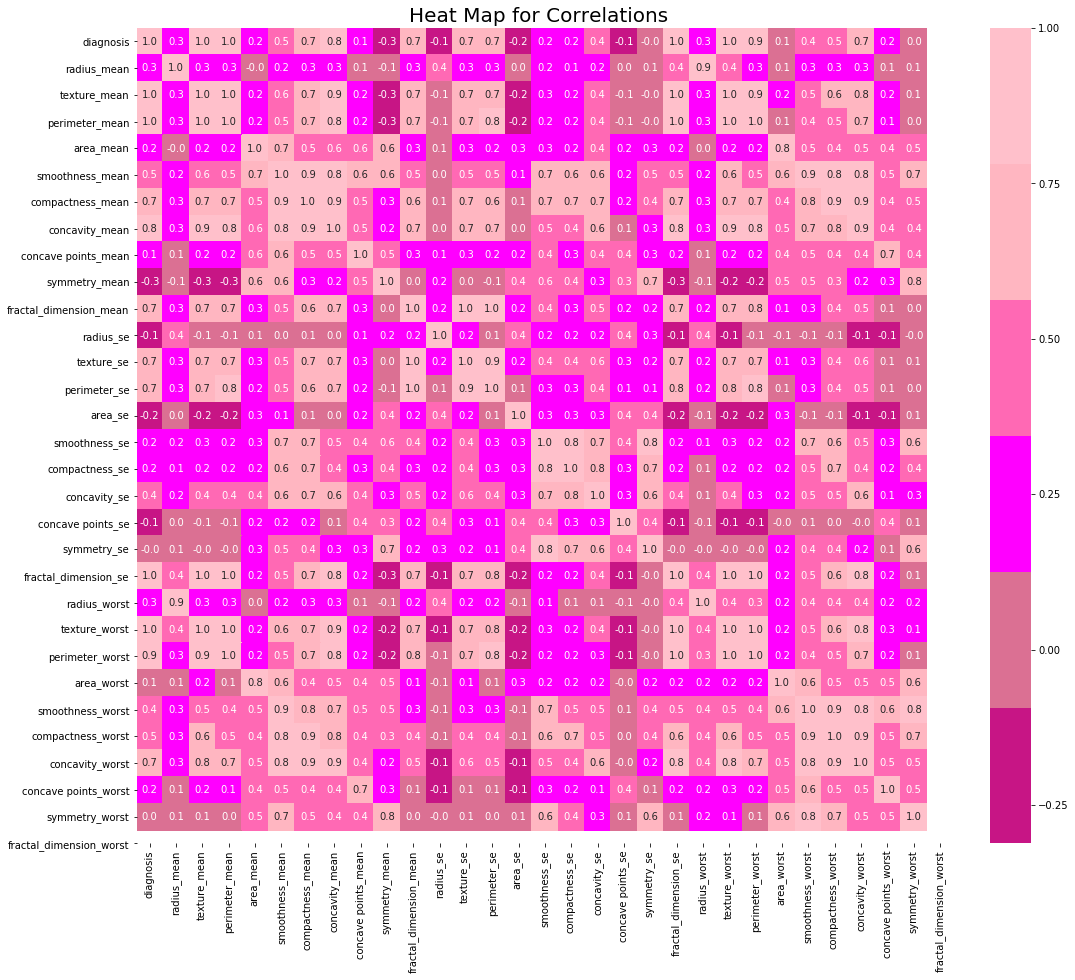

In [12]:
plt.figure(figsize=(18,15))

sns.heatmap(bc_corr, cbar = True, annot = True, yticklabels = drop_id_dataset.columns,
           cmap = ListedColormap(['#C71585', '#DB7093', '#FF00FF', '#FF69B4', '#FFB6C1', '#FFC0CB']),
           xticklabels = drop_id_dataset.columns, fmt = '.1f')
plt.title('Heat Map for Correlations', fontsize = 20)

plt.show()

### Finding the top 5 correlated features

In [13]:
high_corr = bc_corr.abs()
high_corr_unstack = high_corr.unstack() # unstacks the row to columns
high_corr_sort = high_corr_unstack.sort_values(ascending = False)

high_corr_sort[30:41] # the first 29 values will have a correlation of 1

radius_mean      perimeter_mean     0.997855
perimeter_mean   radius_mean        0.997855
radius_worst     perimeter_worst    0.993708
perimeter_worst  radius_worst       0.993708
radius_mean      area_mean          0.987357
area_mean        radius_mean        0.987357
                 perimeter_mean     0.986507
perimeter_mean   area_mean          0.986507
radius_worst     area_worst         0.984015
area_worst       radius_worst       0.984015
perimeter_worst  area_worst         0.977578
dtype: float64

### Finding trends and looking at the joint distribution of the highest correlated feature

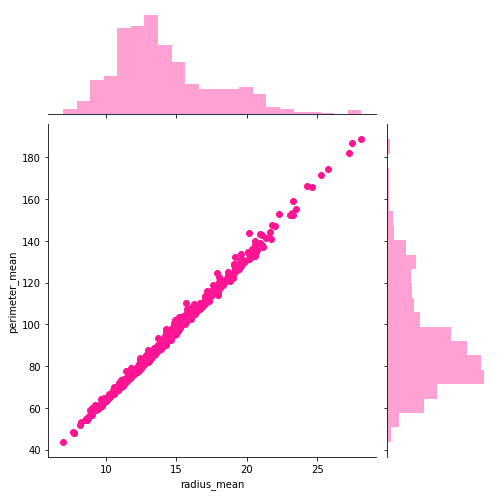

In [14]:
sns.jointplot('radius_mean', 'perimeter_mean', data = dataset, kind = "scatter", 
              space = 0.1, color="#FF1493", height = 7, ratio = 3) # plot two high-correlation variables from the dataset
plt.show()

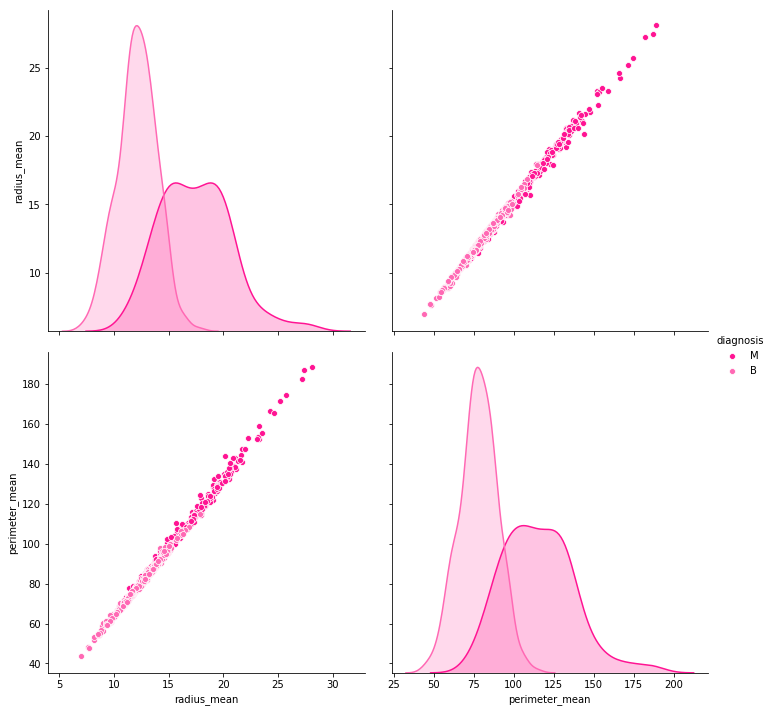

In [15]:
sns.pairplot(dataset, vars= ["radius_mean", "perimeter_mean"], palette = sns.color_palette(['#FF1493', '#FF69B4']), 
            hue = 'diagnosis', height=5) # visualize the relationship between two variables, where the variables can be continuous
plt.show()

### Diagnosis based visualization

In [16]:
M = dataset[(dataset['diagnosis'] == 'M')]
B = dataset[(dataset['diagnosis'] == 'B')]

In [17]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

def plot_distribution(data_select, size_bin) :  
    tmp1 = M[data_select]
    tmp2 = B[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['malignant', 'benign']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')
    
plot_distribution('radius_mean', .5)
# plot_distribution('perimeter_mean', .5)
# Any feature can be visualized by replacing the current one

# Maching Learning

## To predict the diagnosis type using SVM : B/M
## Since this is a two-class classification problem, I will attempt to solve it initially using SVM since it is an excellent classifier algorithm.

In [18]:
target = drop_id_dataset['diagnosis']
target = pd.DataFrame(target)
data = drop_id_dataset.drop('diagnosis', axis = 1)

### Changing the target variables from M and B to 1 and 0 respectively using Label Encoding.

In [19]:
from sklearn.preprocessing import LabelEncoder

# performing label encoding
le = LabelEncoder()
target = le.fit_transform(target) # 1: Malignant, 0: Benign

In [20]:
from sklearn.model_selection import train_test_split

# Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(data, target, stratify = target, test_size = 0.25, random_state = 2)

In [21]:
print("X-train shape:", X_train.shape)
print("y-train shape:", y_train.shape)
print("X-test shape:", X_test.shape)
print("y-test shape:", y_test.shape)

X-train shape: (426, 30)
y-train shape: (426,)
X-test shape: (143, 30)
y-test shape: (143,)


### Preprocessing the data by standardizing the features to a Standard normal distribution.

In [22]:
# to avoid overfitting, we transform the values (scaling each feature to a given range)
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

## Plots and insights

### Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix, roc_curve
import itertools

def plot_confusion_matrix(cm):
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, cmap = plt.cm.Blues, interpolation='nearest')
    plt.title('Confusion Matrix', fontsize = 15)
    plt.xticks([0, 1], [0, 1])
    plt.yticks([0, 1], [0, 1])
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### Printing Classification Metrics like Accuracy, Precision, Recall and F-1 Score

In [24]:
def print_metrics(cm):
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Accuracy  =     {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

### ROC Curve

In [25]:
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

### SVM

In [26]:
from sklearn.svm import SVC

In [27]:
svm = SVC(gamma = 'auto')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_score_svm = svm.decision_function(X_test)

In [28]:
print("Support vector machine training set accuracy:", round(svm.score(X_train, y_train),4))
print("Support vector machine testing set accuracy:", round(svm.score(X_test, y_test),4))

Support vector machine training set accuracy: 0.9906
Support vector machine testing set accuracy: 0.951


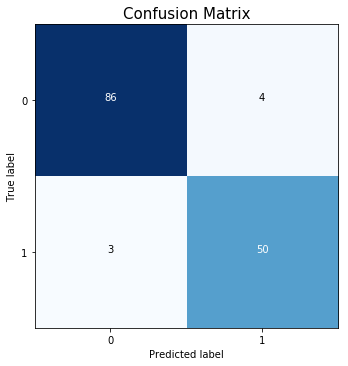

In [29]:
cm = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(cm)

In [30]:
print_metrics(cm)

Accuracy  =     0.951
Precision =     0.926
Recall    =     0.943
F1_score  =     0.935


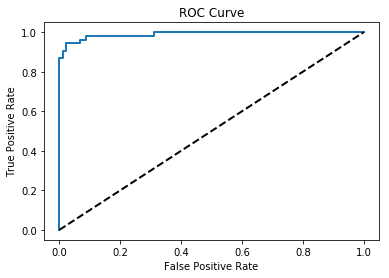

In [31]:
fpr, tpr, t = roc_curve(y_test, y_score_svm)
plot_roc()

## Trying other algorithms

### Decision Trees

In [32]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
 
print(f"Decision tree training set accuracy: {format(tree.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(tree.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 1.0000 
Decision tree testing set accuracy: 0.9161 


In [33]:
# to avoid overfitting, set limit on depth of tree

tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
 
print(f"Decision tree training set accuracy: {format(tree.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(tree.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 0.9930 
Decision tree testing set accuracy: 0.9231 


In [34]:
# Feature importance

print(f"Breast Cancer Feature Importances: \n {format(tree.feature_importances_)} ")

Breast Cancer Feature Importances: 
 [0.         0.         0.         0.         0.         0.
 0.         0.74462911 0.         0.         0.         0.
 0.00515883 0.         0.         0.         0.         0.
 0.         0.02189002 0.         0.07327952 0.01792695 0.10990343
 0.00487629 0.         0.         0.         0.         0.02233585] 


In [35]:
breast_cancer_features = [x for i,x in enumerate(drop_id_dataset.columns) if i!=30]
 
def breast_cancer_feature_importances_plot(model):
    plt.figure(figsize=(20,8))
    n_features = 30
    plt.barh(range(n_features), model.feature_importances_, align='center', color=['#FF69B4'])
    plt.yticks(np.arange(n_features), breast_cancer_features)
    plt.title('Breast Cancer Decision Trees Features Importances')
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.show();

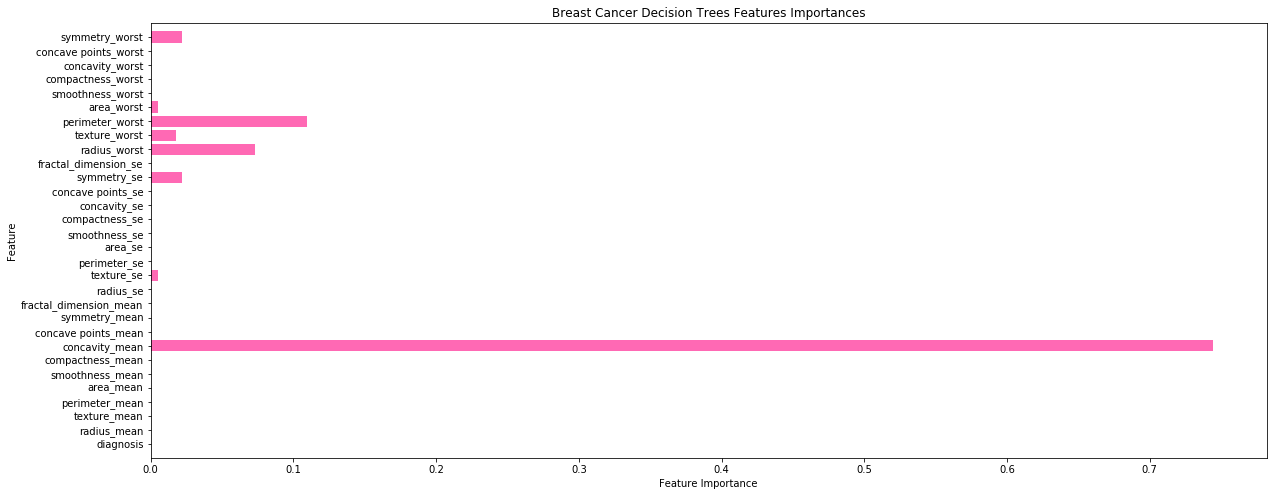

In [36]:
breast_cancer_feature_importances_plot(tree)

#### Concavity Mean comes out to be the most significant feature in determing the diagnosis according to Decision Tree Classifier!

### Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

boosting = GradientBoostingClassifier()
boosting.fit(X_train, y_train)
 
print(f"Gradient boosting training set accuracy: {format(boosting.score(X_train, y_train), '.4f')} ")
print(f"Gradient boosting testing set accuracy: {format(boosting.score(X_test, y_test), '.4f')} ")

Gradient boosting training set accuracy: 1.0000 
Gradient boosting testing set accuracy: 0.9371 


### To avoid overfitting, we define the maximum depth of every tree to be 1.

In [38]:
max_boosting = GradientBoostingClassifier(max_depth=1)
max_boosting.fit(X_train, y_train)
 
print(f"Gradient boosting training set accuracy: {format(max_boosting.score(X_train, y_train), '.4f')} ")
print(f"Gradient boosting testing set accuracy: {format(max_boosting.score(X_test, y_test), '.4f')} ")

Gradient boosting training set accuracy: 0.9953 
Gradient boosting testing set accuracy: 0.9371 


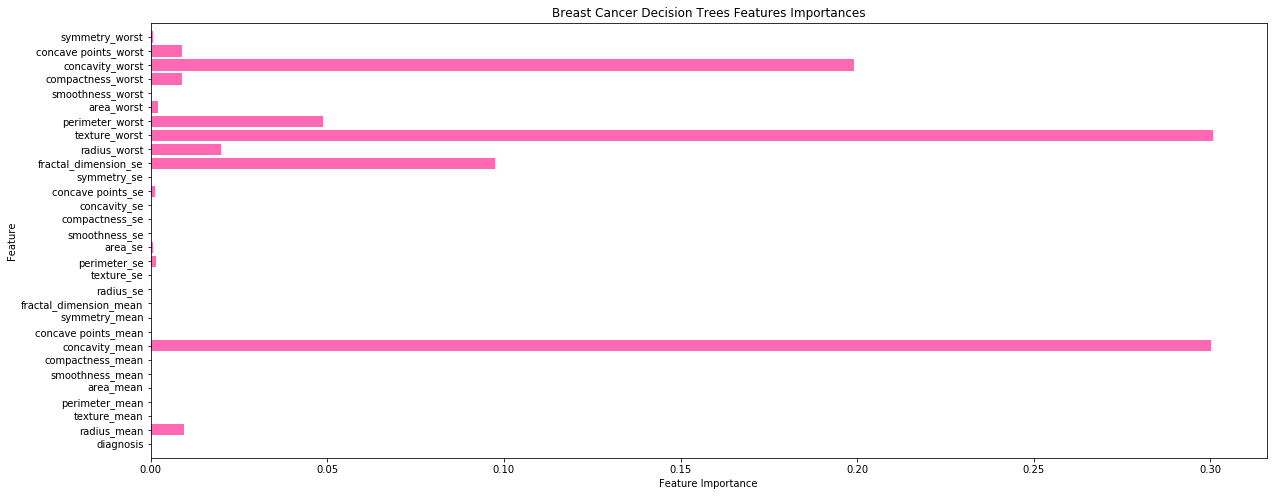

In [39]:
breast_cancer_feature_importances_plot(max_boosting)

#### Concavity Mean along with Texture Worst comes out to be the most significant feature in determing the diagnosis according to Gradient Boosting Classifier!

### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
 
print(f"Random forest training set accuracy: {format(forest.score(X_train, y_train), '.4f')} ")
print(f"Random forest testing set accuracy: {format(forest.score(X_test, y_test), '.4f')} ")

Random forest training set accuracy: 1.0000 
Random forest testing set accuracy: 0.9441 


### To avoid overfitting, we set a maximum depth of 5 and number of trees in the forest as 100.

In [41]:
forest = RandomForestClassifier(max_depth=5, n_estimators=100)
forest.fit(X_train, y_train)
 
print(f"Random forest training set accuracy: {format(forest.score(X_train, y_train), '.4f')} ")
print(f"Random forest testing set accuracy: {format(forest.score(X_test, y_test), '.4f')} ")

Random forest training set accuracy: 0.9953 
Random forest testing set accuracy: 0.9371 


In [42]:
# Feature Importance

print(f"Breast Cancer Feature Importances: \n {format(forest.feature_importances_)} ")

Breast Cancer Feature Importances: 
 [0.02159947 0.01435974 0.0478743  0.0568753  0.00187907 0.01033035
 0.02809129 0.15000069 0.00124231 0.00332406 0.00906942 0.00194353
 0.00374271 0.03279955 0.0035607  0.00341024 0.00260037 0.00218288
 0.00278635 0.00334918 0.10648716 0.01801344 0.12898887 0.12520885
 0.00725659 0.01679465 0.03467418 0.1426693  0.01147393 0.00741148] 


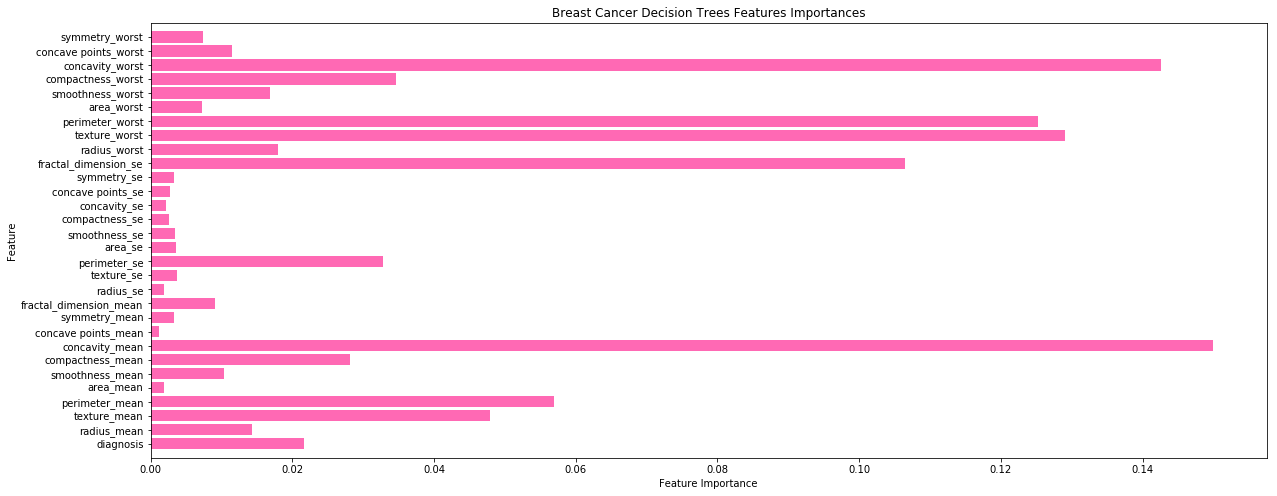

In [43]:
breast_cancer_feature_importances_plot(forest)

#### Texture Worst comes out to be the most significant feature in determing the diagnosis according to Random Forest  Classifier!

### Logistic Regression

### Using Grid Search for finding the perfect parameter for the Logistic Regression model. Also called hyperparameter tuning. 

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression()
param_grid = {
            'penalty' : ['l1','l2'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

cv_logreg = GridSearchCV(estimator = logreg, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1)

cv_logreg.fit(X_train, y_train)

best_parameters = cv_logreg.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


The best parameters for using this model is {'C': 1, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  55 out of  70 | elapsed:    2.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.1s finished


#### The regularization parameter is 1 and L2 (Ridge) penalty term works best! 

In [45]:
# Regularization parameter
logreg = LogisticRegression(C=1, penalty='l2').fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_score_logreg = logreg.decision_function(X_test)

print(f"Logistic Regression training set classification score: {format(logreg.score(X_train, y_train), '.4f')} ")
print(f"Logistic Regression testing set classification score: {format(logreg.score(X_test, y_test), '.4f')} ")

Logistic Regression training set classification score: 0.9930 
Logistic Regression testing set classification score: 0.9580 


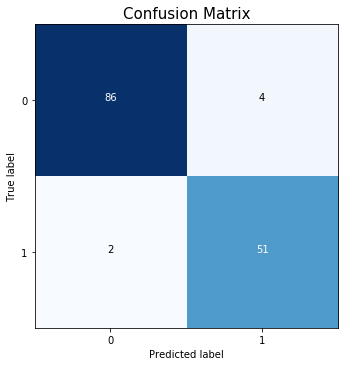

In [46]:
cm = confusion_matrix(y_test, y_pred_logreg)
plot_confusion_matrix(cm)

In [47]:
print_metrics(cm)

Accuracy  =     0.958
Precision =     0.927
Recall    =     0.962
F1_score  =     0.944


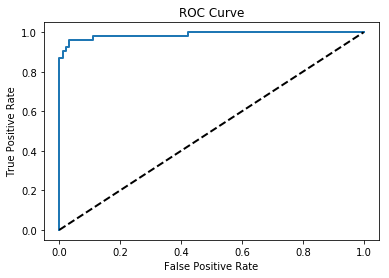

In [48]:
fpr, tpr, t = roc_curve(y_test, y_score_logreg)
plot_roc()

## Recursive features elimination (RFE) with Logistic Regression

### Feature ranking with recursive feature elimination.

In [49]:
from sklearn.feature_selection import RFE

selector = RFE(logreg)
selector = selector.fit(X_train, y_train)
y_pred = selector.predict(X_test)
y_score = selector.predict_proba(X_test)[:,1]

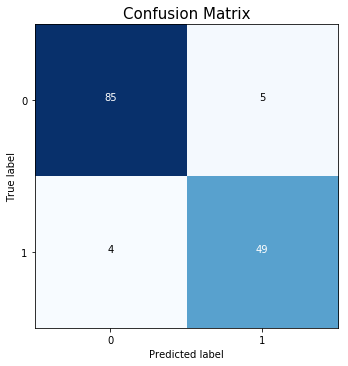

In [50]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

In [51]:
print_metrics(cm)

Accuracy  =     0.937
Precision =     0.907
Recall    =     0.925
F1_score  =     0.916


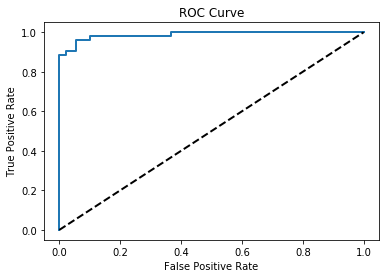

In [52]:
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# FIN!